# Monitor results

In [32]:
from exp import *

In [33]:
# results_file_name = 'segmentation_analysis_seed'
# columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']

# results_file_name = 'results/segmentation_analysis_seed'
# # columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']
# columns = ['Baseline','Segmented']

# results_file_name = 'results/color_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray']

# results_file_name = 'results/resnet_50_arl_seed'
# columns = ['Baseline','ARL']

# results_file_name = 'results/efficientnet_attention_analysis_run_seed'
# columns = ['Baseline','Without SE', "Without SE and with ARL", "With Both"]

# results_file_name = 'ben_analysis_seed'
# columns = ['Baseline','ben_color_transform']

# results_file_name = 'results/hsv_analysis_seed'
# columns = ['Baseline','HSV']

results_file_name = 'results/color_ben_analysis_seed'
columns = ['Baseline','Max RGB','Shades of Gray', 'Ben Graham']


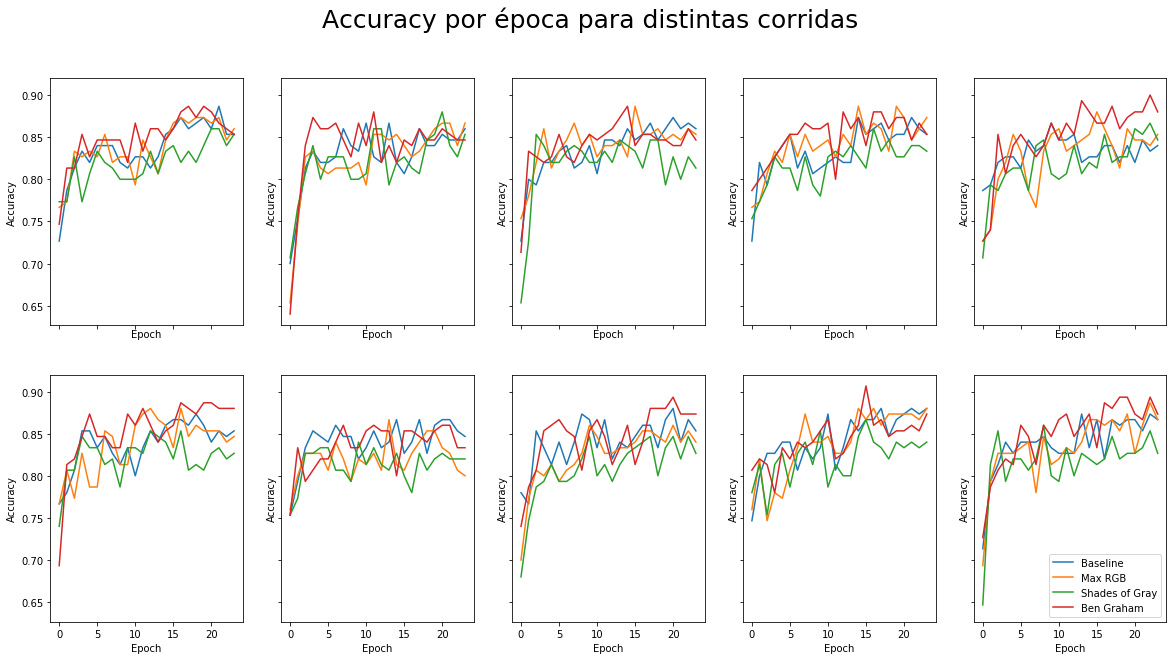

In [34]:
runs = {}
baseline = {}
fig, axs = plt.subplots(2,5, figsize=(20,10), sharey=True, sharex=True)
fig.suptitle('Accuracy por época para distintas corridas', fontsize=25)

for i in range(1,11):
#     baseline[i] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
    runs[i] = pd.read_csv(f'{results_file_name}_{i}.txt')
#     runs[i]['Baseline'] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
#     print(runs[i])
#     del runs[i]['Baseline SOG']
#     del runs[i]['Segmented SOG']
#     print(runs[i])
    ax = axs[(i-1) // 5 , (i-1) %5]
    ax.plot(runs[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

#     runs[i].plot()
plt.legend(runs[i].columns)


In [35]:
max_dicc = {col: [runs[r].max()[col] for r in runs] for col in columns }

max_dicc

{'Baseline': [0.8866666555404663,
  0.8666666746139526,
  0.8733333349227905,
  0.8733333349227905,
  0.8666666746139526,
  0.8733333349227905,
  0.8666666746139526,
  0.8799999952316284,
  0.8799999952316284,
  0.8733333349227905],
 'Max RGB': [0.8733333349227905,
  0.8666666746139526,
  0.8866666555404663,
  0.8866666555404663,
  0.8799999952316284,
  0.8799999952316284,
  0.8666666746139526,
  0.8600000143051147,
  0.8799999952316284,
  0.8866666555404663],
 'Shades of Gray': [0.8600000143051147,
  0.8799999952316284,
  0.8533333539962769,
  0.8600000143051147,
  0.8666666746139526,
  0.8533333539962769,
  0.8399999737739563,
  0.8466666936874391,
  0.8666666746139526,
  0.8600000143051147],
 'Ben Graham': [0.8866666555404663,
  0.8799999952316284,
  0.8866666555404663,
  0.8799999952316284,
  0.8999999761581421,
  0.8866666555404663,
  0.8600000143051147,
  0.8933333158493042,
  0.9066666960716248,
  0.8933333158493042]}

In [36]:
df = pd.DataFrame(max_dicc)

In [37]:
def highlight_max(s):
    '''
    bold the maximum in a Series.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [38]:
df.describe().transpose().style.apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
Baseline,10.000000,0.874000,0.006630,0.866667,0.868333,0.873333,0.878333,0.886667
Max RGB,10.000000,0.876667,0.009558,0.860000,0.868333,0.880000,0.885000,0.886667
Shades of Gray,10.000000,0.858667,0.011244,0.840000,0.853333,0.860000,0.865000,0.880000
Ben Graham,10.000000,0.887333,0.012746,0.860000,0.881667,0.886667,0.893333,0.906667
